<a href="https://colab.research.google.com/github/syamkakarla98/Satellite_Imagery_Analysis/blob/main/Classification/Land_Cover_Classification_in_Satellite_Imagery_using_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <font color='tomato'>Land Cover Classification in Satellite Imagery using Python</font>

In [1]:
%pip install earthpy gdal

Defaulting to user installation because normal site-packages is not writeable


Note: you may need to restart the kernel to use updated packages.


# Import Modules

In [2]:
from glob import glob

import earthpy as et
import earthpy.spatial as es
import earthpy.plot as ep

import rasterio as rio
from rasterio.plot import plotting_extent
from rasterio.plot import show
from rasterio.plot import reshape_as_raster, reshape_as_image

import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import ListedColormap

from scipy.io import loadmat
from sklearn.metrics import classification_report, accuracy_score

import plotly.graph_objects as go
import os
import subprocess
import imagecodecs

np.seterr(divide='ignore', invalid='ignore')

/home/eugene/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


{'divide': 'warn', 'over': 'warn', 'under': 'ignore', 'invalid': 'warn'}

# Read Data

In [3]:
S_sentinel_bands = glob("../Data/sundarbans_raw_data/*B?*.tiff")
S_sentinel_bands.sort()
S_sentinel_bands

['../Data/sundarbans_raw_data/2020-01-27-00_00_2020-01-27-23_59_Sentinel-2_L2A_B01_(Raw).tiff',
 '../Data/sundarbans_raw_data/2020-01-27-00_00_2020-01-27-23_59_Sentinel-2_L2A_B02_(Raw).tiff',
 '../Data/sundarbans_raw_data/2020-01-27-00_00_2020-01-27-23_59_Sentinel-2_L2A_B03_(Raw).tiff',
 '../Data/sundarbans_raw_data/2020-01-27-00_00_2020-01-27-23_59_Sentinel-2_L2A_B04_(Raw).tiff',
 '../Data/sundarbans_raw_data/2020-01-27-00_00_2020-01-27-23_59_Sentinel-2_L2A_B05_(Raw).tiff',
 '../Data/sundarbans_raw_data/2020-01-27-00_00_2020-01-27-23_59_Sentinel-2_L2A_B06_(Raw).tiff',
 '../Data/sundarbans_raw_data/2020-01-27-00_00_2020-01-27-23_59_Sentinel-2_L2A_B07_(Raw).tiff',
 '../Data/sundarbans_raw_data/2020-01-27-00_00_2020-01-27-23_59_Sentinel-2_L2A_B08_(Raw).tiff',
 '../Data/sundarbans_raw_data/2020-01-27-00_00_2020-01-27-23_59_Sentinel-2_L2A_B09_(Raw).tiff',
 '../Data/sundarbans_raw_data/2020-01-27-00_00_2020-01-27-23_59_Sentinel-2_L2A_B11_(Raw).tiff',
 '../Data/sundarbans_raw_data/2020-01-27

In [4]:
for s in S_sentinel_bands:
    output_path = s.replace('sundarbans_raw_data', 'sundarbans_raw_data_jxl').split(".tiff")[0] + '.jxl'
    png_path = s.replace('sundarbans_raw_data', 'sundarbans_raw_data_jxl').split(".tiff")[0] + '.png'
    subprocess.run(['gdal_translate','-of', 'PNG','-b','1', s, png_path])
    subprocess.run(['./cjxl','-q', '95', png_path, output_path])
    print(output_path)
    os.remove(png_path)

Warning 1: ../Data/sundarbans_raw_data/2020-01-27-00_00_2020-01-27-23_59_Sentinel-2_L2A_B01_(Raw).tiff: TIFFReadDirectory:Sum of Photometric type-related color channels and ExtraSamples doesn't match SamplesPerPixel. Defining non-color channels as ExtraSamples.
Warning 1: TIFFReadDirectory:Sum of Photometric type-related color channels and ExtraSamples doesn't match SamplesPerPixel. Defining non-color channels as ExtraSamples.
JPEG XL encoder v0.10.1 5f67ebc [AVX2,SSE4,SSE2]
Encoding [VarDCT, d0.550, effort: 7]
Compressed to 11562 bytes (0.325 bpp).
298 x 954, 6.677 MP/s [6.68, 6.68], 1 reps, 16 threads.


Input file size is 298, 954
0...10...20...30...40...50...60...70...80...90...100 - done.
../Data/sundarbans_raw_data_jxl/2020-01-27-00_00_2020-01-27-23_59_Sentinel-2_L2A_B01_(Raw).jxl


Warning 1: ../Data/sundarbans_raw_data/2020-01-27-00_00_2020-01-27-23_59_Sentinel-2_L2A_B02_(Raw).tiff: TIFFReadDirectory:Sum of Photometric type-related color channels and ExtraSamples doesn't match SamplesPerPixel. Defining non-color channels as ExtraSamples.
Warning 1: TIFFReadDirectory:Sum of Photometric type-related color channels and ExtraSamples doesn't match SamplesPerPixel. Defining non-color channels as ExtraSamples.
JPEG XL encoder v0.10.1 5f67ebc [AVX2,SSE4,SSE2]
Encoding [VarDCT, d0.550, effort: 7]
Compressed to 34467 bytes (0.970 bpp).
298 x 954, 6.090 MP/s [6.09, 6.09], 1 reps, 16 threads.
Warning 1: ../Data/sundarbans_raw_data/2020-01-27-00_00_2020-01-27-23_59_Sentinel-2_L2A_B03_(Raw).tiff: TIFFReadDirectory:Sum of Photometric type-related color channels and ExtraSamples doesn't match SamplesPerPixel. Defining non-color channels as ExtraSamples.
Warning 1: TIFFReadDirectory:Sum of Photometric type-related color channels and ExtraSamples doesn't match SamplesPerPixel. De

Input file size is 298, 954
0...10...20...30...40...50...60...70...80...90...100 - done.
../Data/sundarbans_raw_data_jxl/2020-01-27-00_00_2020-01-27-23_59_Sentinel-2_L2A_B02_(Raw).jxl
Input file size is 298, 954
0...10...20...30...40...50...60...70...80...90...100 - done.
../Data/sundarbans_raw_data_jxl/2020-01-27-00_00_2020-01-27-23_59_Sentinel-2_L2A_B03_(Raw).jxl
Input file size is 298, 954
0...10...20...30...40...50...60...70...80

JPEG XL encoder v0.10.1 5f67ebc [AVX2,SSE4,SSE2]
Encoding [VarDCT, d0.550, effort: 7]
Compressed to 41361 bytes (1.164 bpp).
298 x 954, 7.204 MP/s [7.20, 7.20], 1 reps, 16 threads.
Warning 1: ../Data/sundarbans_raw_data/2020-01-27-00_00_2020-01-27-23_59_Sentinel-2_L2A_B04_(Raw).tiff: TIFFReadDirectory:Sum of Photometric type-related color channels and ExtraSamples doesn't match SamplesPerPixel. Defining non-color channels as ExtraSamples.
Warning 1: TIFFReadDirectory:Sum of Photometric type-related color channels and ExtraSamples doesn't match SamplesPerPixel. Defining non-color channels as ExtraSamples.
JPEG XL encoder v0.10.1 5f67ebc [AVX2,SSE4,SSE2]
Encoding [VarDCT, d0.550, effort: 7]


...90...100 - done.
../Data/sundarbans_raw_data_jxl/2020-01-27-00_00_2020-01-27-23_59_Sentinel-2_L2A_B04_(Raw).jxl
Input file size is 298, 954
0...10...20...30...40...50...60...70...80...90...100 - done.


Compressed to 48366 bytes (1.361 bpp).
298 x 954, 6.888 MP/s [6.89, 6.89], 1 reps, 16 threads.
Warning 1: ../Data/sundarbans_raw_data/2020-01-27-00_00_2020-01-27-23_59_Sentinel-2_L2A_B05_(Raw).tiff: TIFFReadDirectory:Sum of Photometric type-related color channels and ExtraSamples doesn't match SamplesPerPixel. Defining non-color channels as ExtraSamples.
Warning 1: TIFFReadDirectory:Sum of Photometric type-related color channels and ExtraSamples doesn't match SamplesPerPixel. Defining non-color channels as ExtraSamples.
JPEG XL encoder v0.10.1 5f67ebc [AVX2,SSE4,SSE2]
Encoding [VarDCT, d0.550, effort: 7]
Compressed to 43009 bytes (1.210 bpp).
298 x 954, 7.409 MP/s [7.41, 7.41], 1 reps, 16 threads.


../Data/sundarbans_raw_data_jxl/2020-01-27-00_00_2020-01-27-23_59_Sentinel-2_L2A_B05_(Raw).jxl
Input file size is 298, 954
0...10...20...30...40...50...60...70...80...90...100 - done.
../Data/sundarbans_raw_data_jxl/2020-01-27-00_00_2020-01-27-23_59_Sentinel-2_L2A_B06_(Raw).jxl


Warning 1: ../Data/sundarbans_raw_data/2020-01-27-00_00_2020-01-27-23_59_Sentinel-2_L2A_B06_(Raw).tiff: TIFFReadDirectory:Sum of Photometric type-related color channels and ExtraSamples doesn't match SamplesPerPixel. Defining non-color channels as ExtraSamples.
Warning 1: TIFFReadDirectory:Sum of Photometric type-related color channels and ExtraSamples doesn't match SamplesPerPixel. Defining non-color channels as ExtraSamples.
JPEG XL encoder v0.10.1 5f67ebc [AVX2,SSE4,SSE2]
Encoding [VarDCT, d0.550, effort: 7]
Compressed to 63167 bytes (1.778 bpp).
298 x 954, 6.970 MP/s [6.97, 6.97], 1 reps, 16 threads.
Warning 1: ../Data/sundarbans_raw_data/2020-01-27-00_00_2020-01-27-23_59_Sentinel-2_L2A_B07_(Raw).tiff: TIFFReadDirectory:Sum of Photometric type-related color channels and ExtraSamples doesn't match SamplesPerPixel. Defining non-color channels as ExtraSamples.
Warning 1: TIFFReadDirectory:Sum of Photometric type-related color channels and ExtraSamples doesn't match SamplesPerPixel. De

Input file size is 298, 954
0...10...20...30...40...50...60...70...80...90...100 - done.
../Data/sundarbans_raw_data_jxl/2020-01-27-00_00_2020-01-27-23_59_Sentinel-2_L2A_B07_(Raw).jxl
Input file size is 298, 954
0...10...20...30...40...50..

JPEG XL encoder v0.10.1 5f67ebc [AVX2,SSE4,SSE2]
Encoding [VarDCT, d0.550, effort: 7]
Compressed to 68228 bytes (1.920 bpp).
298 x 954, 6.557 MP/s [6.56, 6.56], 1 reps, 16 threads.
Warning 1: ../Data/sundarbans_raw_data/2020-01-27-00_00_2020-01-27-23_59_Sentinel-2_L2A_B08_(Raw).tiff: TIFFReadDirectory:Sum of Photometric type-related color channels and ExtraSamples doesn't match SamplesPerPixel. Defining non-color channels as ExtraSamples.
Warning 1: TIFFReadDirectory:Sum of Photometric type-related color channels and ExtraSamples doesn't match SamplesPerPixel. Defining non-color channels as ExtraSamples.
JPEG XL encoder v0.10.1 5f67ebc [AVX2,SSE4,SSE2]
Encoding [VarDCT, d0.550, effort: 7]


.60...70...80...90...100 - done.
../Data/sundarbans_raw_data_jxl/2020-01-27-00_00_2020-01-27-23_59_Sentinel-2_L2A_B08_(Raw).jxl
Input file size is 298, 954
0...10...20...30...40...50...60...70...80...90...100 - done.


Compressed to 96027 bytes (2.702 bpp).
298 x 954, 6.820 MP/s [6.82, 6.82], 1 reps, 16 threads.
Warning 1: ../Data/sundarbans_raw_data/2020-01-27-00_00_2020-01-27-23_59_Sentinel-2_L2A_B09_(Raw).tiff: TIFFReadDirectory:Sum of Photometric type-related color channels and ExtraSamples doesn't match SamplesPerPixel. Defining non-color channels as ExtraSamples.
Warning 1: TIFFReadDirectory:Sum of Photometric type-related color channels and ExtraSamples doesn't match SamplesPerPixel. Defining non-color channels as ExtraSamples.
JPEG XL encoder v0.10.1 5f67ebc [AVX2,SSE4,SSE2]
Encoding [VarDCT, d0.550, effort: 7]
Compressed to 28380 bytes (0.799 bpp).
298 x 954, 7.523 MP/s [7.52, 7.52], 1 reps, 16 threads.


../Data/sundarbans_raw_data_jxl/2020-01-27-00_00_2020-01-27-23_59_Sentinel-2_L2A_B09_(Raw).jxl
Input file size is 298, 954
0...10...20...30...40...50...60...70...80...90...100 - done.
../Data/sundarbans_raw_data_jxl/2020-01-27-00_00_2020-01-27-23_59_Sentinel-2_L2A_B11_(Raw).jxl


Warning 1: ../Data/sundarbans_raw_data/2020-01-27-00_00_2020-01-27-23_59_Sentinel-2_L2A_B11_(Raw).tiff: TIFFReadDirectory:Sum of Photometric type-related color channels and ExtraSamples doesn't match SamplesPerPixel. Defining non-color channels as ExtraSamples.
Warning 1: TIFFReadDirectory:Sum of Photometric type-related color channels and ExtraSamples doesn't match SamplesPerPixel. Defining non-color channels as ExtraSamples.
JPEG XL encoder v0.10.1 5f67ebc [AVX2,SSE4,SSE2]
Encoding [VarDCT, d0.550, effort: 7]
Compressed to 53156 bytes (1.496 bpp).
298 x 954, 6.843 MP/s [6.84, 6.84], 1 reps, 16 threads.
Warning 1: ../Data/sundarbans_raw_data/2020-01-27-00_00_2020-01-27-23_59_Sentinel-2_L2A_B12_(Raw).tiff: TIFFReadDirectory:Sum of Photometric type-related color channels and ExtraSamples doesn't match SamplesPerPixel. Defining non-color channels as ExtraSamples.
Warning 1: TIFFReadDirectory:Sum of Photometric type-related color channels and ExtraSamples doesn't match SamplesPerPixel. De

Input file size is 298, 954
0...10...20...30...40...50...60...70...80...90...100 - done.
../Data/sundarbans_raw_data_jxl/2020-01-27-00_00_2020-01-27-23_59_Sentinel-2_L2A_B12_(Raw).jxl
Input file size is 298, 954
0...10...20...30...40...50

JPEG XL encoder v0.10.1 5f67ebc [AVX2,SSE4,SSE2]
Encoding [VarDCT, d0.550, effort: 7]
Compressed to 43690 bytes (1.229 bpp).
298 x 954, 7.411 MP/s [7.41, 7.41], 1 reps, 16 threads.
Warning 1: ../Data/sundarbans_raw_data/2020-01-27-00_00_2020-01-27-23_59_Sentinel-2_L2A_B8A_(Raw).tiff: TIFFReadDirectory:Sum of Photometric type-related color channels and ExtraSamples doesn't match SamplesPerPixel. Defining non-color channels as ExtraSamples.
Warning 1: TIFFReadDirectory:Sum of Photometric type-related color channels and ExtraSamples doesn't match SamplesPerPixel. Defining non-color channels as ExtraSamples.
JPEG XL encoder v0.10.1 5f67ebc [AVX2,SSE4,SSE2]
Encoding [VarDCT, d0.550, effort: 7]


...60...70...80...90...100 - done.
../Data/sundarbans_raw_data_jxl/2020-01-27-00_00_2020-01-27-23_59_Sentinel-2_L2A_B8A_(Raw).jxl


Compressed to 70597 bytes (1.987 bpp).
298 x 954, 6.860 MP/s [6.86, 6.86], 1 reps, 16 threads.


In [5]:
S_sentinel_bands = glob("../Data/sundarbans_raw_data_jxl/*B?*.jxl")
S_sentinel_bands.sort()
S_sentinel_bands

['../Data/sundarbans_raw_data_jxl/2020-01-27-00_00_2020-01-27-23_59_Sentinel-2_L2A_B01_(Raw).jxl',
 '../Data/sundarbans_raw_data_jxl/2020-01-27-00_00_2020-01-27-23_59_Sentinel-2_L2A_B02_(Raw).jxl',
 '../Data/sundarbans_raw_data_jxl/2020-01-27-00_00_2020-01-27-23_59_Sentinel-2_L2A_B03_(Raw).jxl',
 '../Data/sundarbans_raw_data_jxl/2020-01-27-00_00_2020-01-27-23_59_Sentinel-2_L2A_B04_(Raw).jxl',
 '../Data/sundarbans_raw_data_jxl/2020-01-27-00_00_2020-01-27-23_59_Sentinel-2_L2A_B05_(Raw).jxl',
 '../Data/sundarbans_raw_data_jxl/2020-01-27-00_00_2020-01-27-23_59_Sentinel-2_L2A_B06_(Raw).jxl',
 '../Data/sundarbans_raw_data_jxl/2020-01-27-00_00_2020-01-27-23_59_Sentinel-2_L2A_B07_(Raw).jxl',
 '../Data/sundarbans_raw_data_jxl/2020-01-27-00_00_2020-01-27-23_59_Sentinel-2_L2A_B08_(Raw).jxl',
 '../Data/sundarbans_raw_data_jxl/2020-01-27-00_00_2020-01-27-23_59_Sentinel-2_L2A_B09_(Raw).jxl',
 '../Data/sundarbans_raw_data_jxl/2020-01-27-00_00_2020-01-27-23_59_Sentinel-2_L2A_B11_(Raw).jxl',
 '../Data/

In [6]:
l = []
for i in S_sentinel_bands:
  f = imagecodecs.imread(i)
  l.append(f)



In [7]:
arr_st = np.stack(l)

In [8]:
print(f'Height: {arr_st.shape[1]}\nWidth: {arr_st.shape[2]}\nBands: {arr_st.shape[0]}')

Height: 954
Width: 298
Bands: 12


# Visualize Data

## Bands

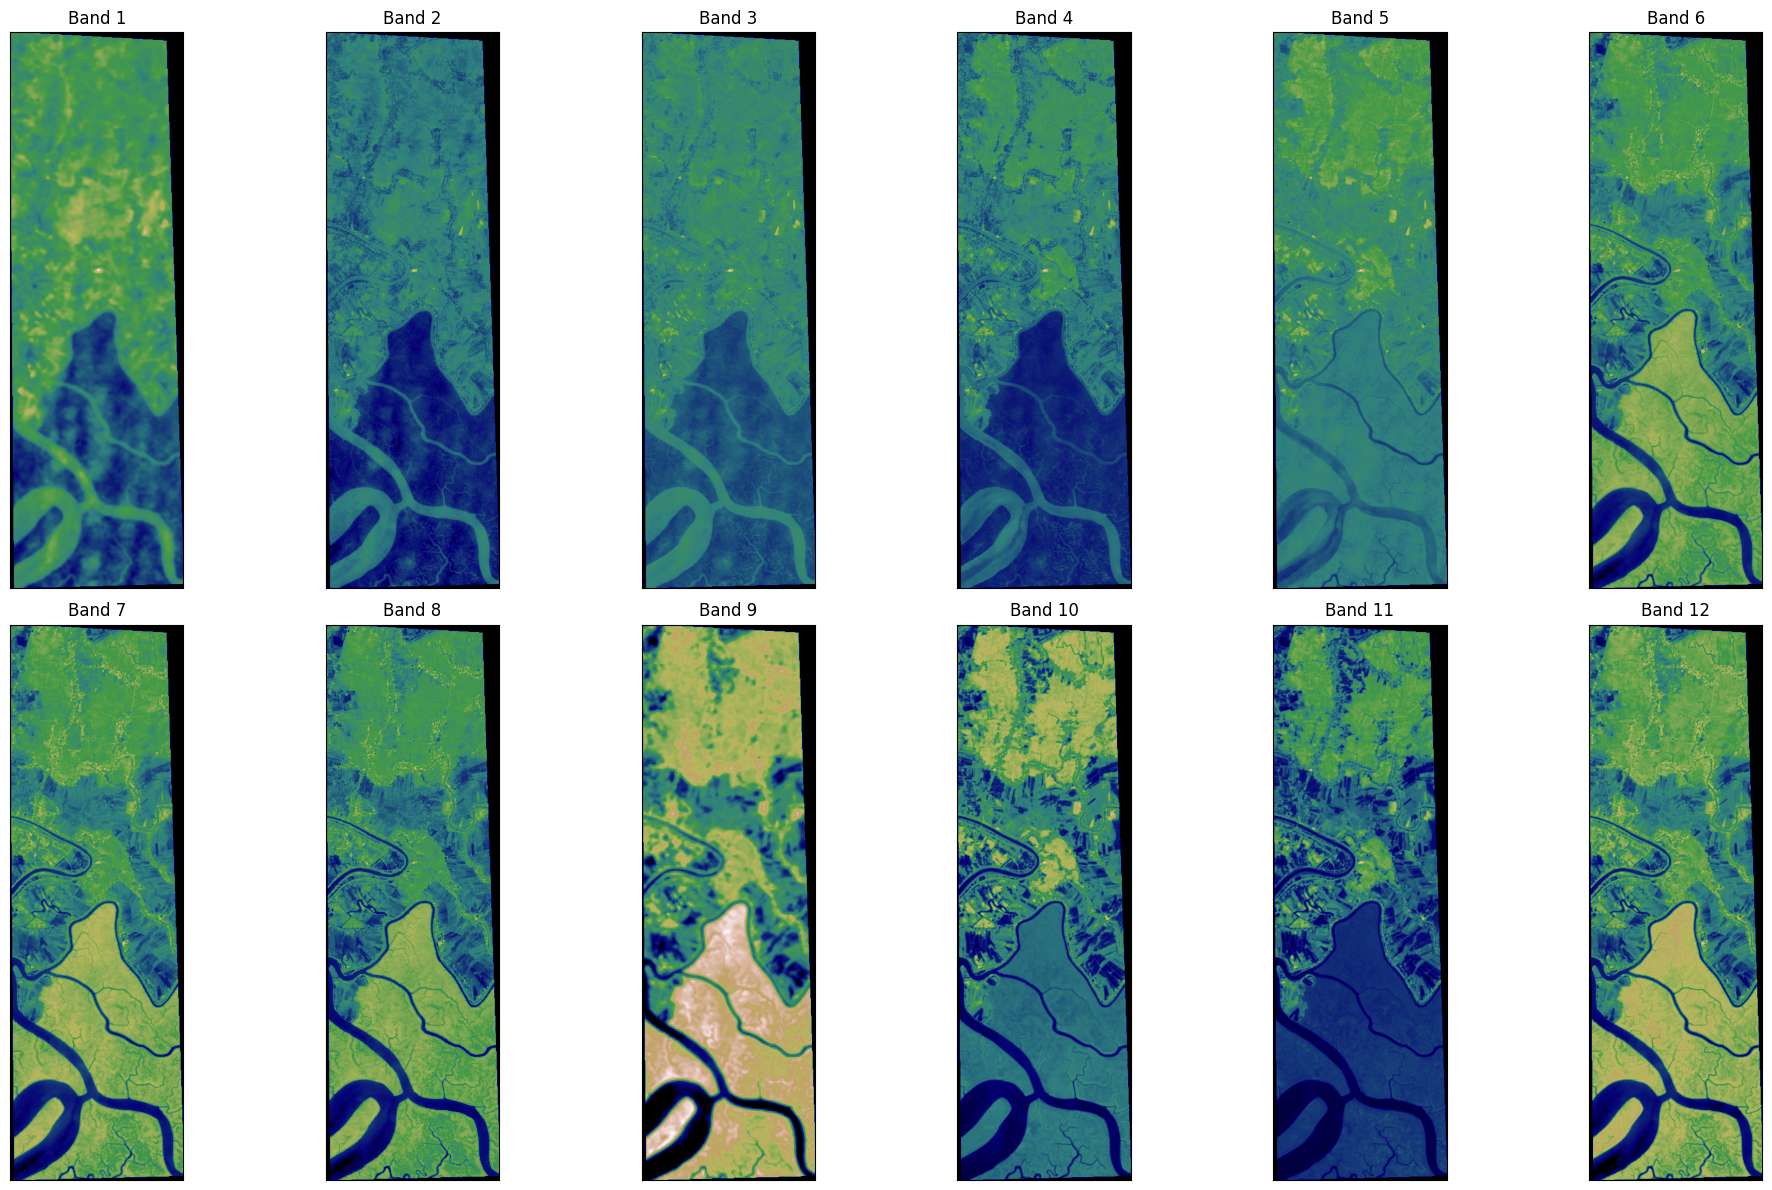

In [9]:
ep.plot_bands(arr_st, cmap = 'gist_earth', figsize = (20, 12), cols = 6, cbar = False)
plt.show()

## RGB Composite Image

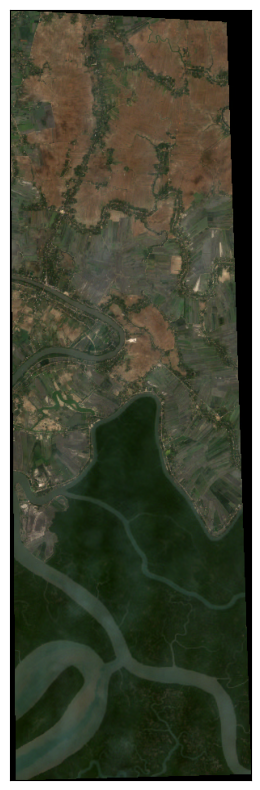

In [10]:
rgb = ep.plot_rgb(arr_st, 
                  rgb=(3,2,1), 
                  figsize=(8, 10), 
                  # title='RGB Composite Image'
                  )

plt.show()

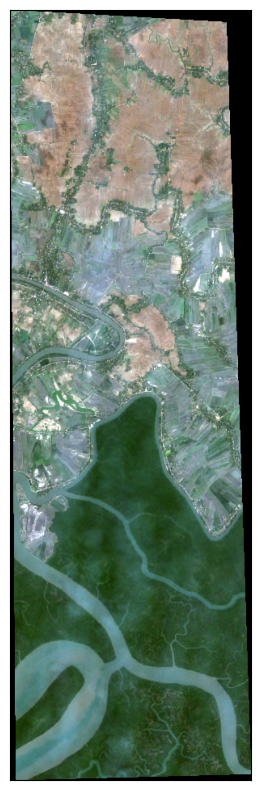

In [11]:
ep.plot_rgb(
    arr_st,
    rgb=(3, 2, 1),
    stretch=True,
    str_clip=0.2,
    figsize=(8, 10),
    # title="RGB Composite Image with Stretch Applied",
)

plt.show()

## Data Distribution of Bands

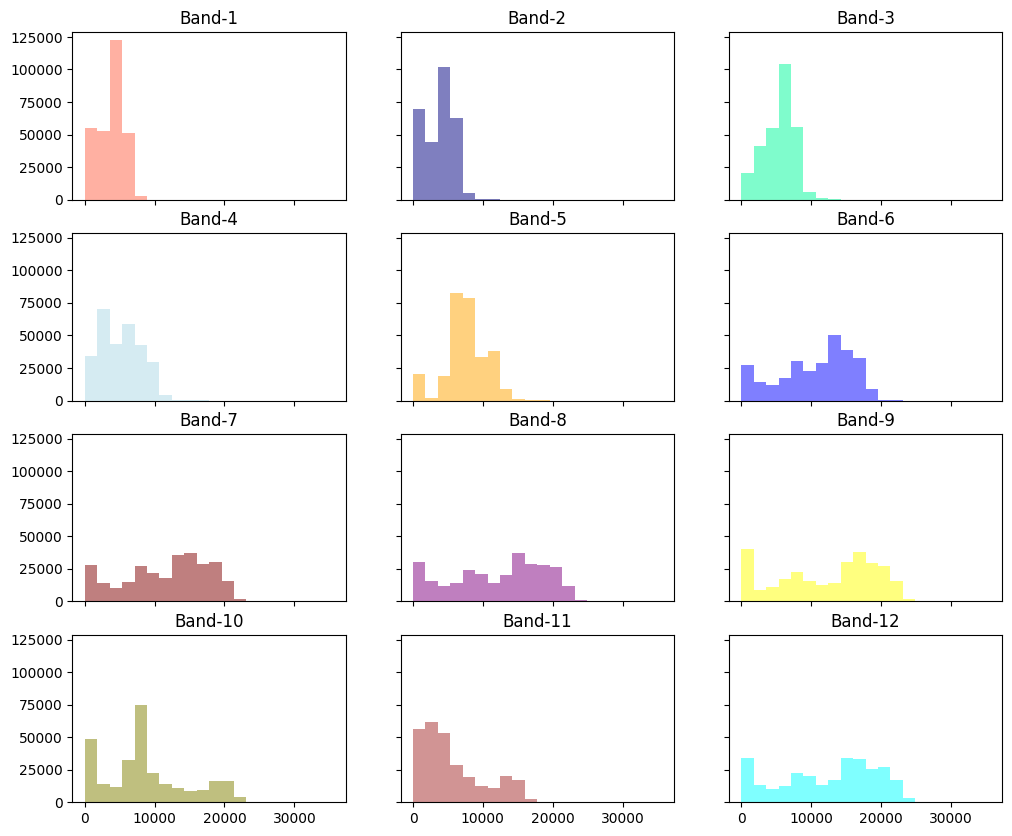

In [12]:
colors = ['tomato', 'navy', 'MediumSpringGreen', 'lightblue', 'orange', 'blue',
          'maroon', 'purple', 'yellow', 'olive', 'brown', 'cyan']

ep.hist(arr_st, 
         colors = colors,
        title=[f'Band-{i}' for i in range(1, 13)], 
        cols=3, 
        alpha=0.5, 
        figsize = (12, 10)
        )

plt.show()

# Preprocessing 

In [13]:
x = np.moveaxis(arr_st, 0, -1)
x.shape

(954, 298, 12)

In [14]:
from sklearn.preprocessing import StandardScaler

X_data = x.reshape(-1, 12)

scaler = StandardScaler().fit(X_data)

X_scaled = scaler.transform(X_data)

X_scaled.shape

(284292, 12)

In [15]:
y_data = loadmat('../Data/sundarbans_data/Sundarbands_gt.mat')['gt']
y_data.shape

(954, 298)

In [16]:
# Visualize Groundtruth

# ep.plot_bands(y_data, cmap=ListedColormap(['darkgreen', 'green', 'black', '#CA6F1E', 'navy', 'forestgreen']))
# plt.show()

# Train Test Split

In [17]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_data.ravel(), test_size=0.30, stratify = y_data.ravel())

print(f'X_train Shape: {X_train.shape}\nX_test Shape: {X_test.shape}\ny_train Shape: {y_train.shape}\ny_test Shape:{y_test.shape}')

X_train Shape: (199004, 12)
X_test Shape: (85288, 12)
y_train Shape: (199004,)
y_test Shape:(85288,)


# K-Nearest Neighbor Classifier (K-NNC)



In [18]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=6)
knn.fit(X_train, y_train)

knn_pred = knn.predict(X_test)

In [19]:
print(f"Accuracy: {accuracy_score(y_test, knn_pred)*100}")

Accuracy: 98.21545821217522


In [20]:
print(classification_report(y_test, knn_pred))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97     16222
           1       0.99      1.00      0.99     23570
           2       1.00      1.00      1.00      6095
           3       0.98      0.99      0.99     16790
           4       0.99      0.98      0.99     13545
           5       0.96      0.92      0.94      9066

    accuracy                           0.98     85288
   macro avg       0.98      0.98      0.98     85288
weighted avg       0.98      0.98      0.98     85288



In [21]:
# Visualize Classification Map of K-NNC

# ep.plot_bands(knn.predict(X_scaled).reshape((954, 298)), 
#               cmap=ListedColormap(['darkgreen', 'green', 'black', 
#                                    '#CA6F1E', 'navy', 'forestgreen']))
# plt.show()

# Support Vector Machine (SVM)

In [22]:
from sklearn.svm import SVC

svm = SVC(C=3.0, kernel='rbf', degree=6, cache_size=1024)
svm.fit(X_train, y_train)

SVC(C=3.0, cache_size=1024, degree=6)

In [23]:
svm_pred = svm.predict(X_test)

In [24]:
print(f"Accuracy: {accuracy_score(y_test, svm_pred)*100}")

Accuracy: 98.73956476878341


In [25]:
print(classification_report(y_test, svm_pred))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98     16222
           1       1.00      1.00      1.00     23570
           2       1.00      1.00      1.00      6095
           3       0.99      0.99      0.99     16790
           4       0.99      0.99      0.99     13545
           5       0.96      0.95      0.96      9066

    accuracy                           0.99     85288
   macro avg       0.99      0.99      0.99     85288
weighted avg       0.99      0.99      0.99     85288



In [26]:
# Visualize Classification Map of SVM

# ep.plot_bands(svm.predict(X_scaled).reshape((954, 298)), 
#               cmap=ListedColormap(['darkgreen', 'green', 'black', 
#                                    '#CA6F1E', 'navy', 'forestgreen']))
# plt.show()

# Light BGM

In [27]:
import lightgbm as lgb

d_train = lgb.Dataset(X_train, label=y_train)

params={}
params['learning_rate']=0.03
params['boosting_type']='gbdt' #GradientBoostingDecisionTree
params['objective']='multiclass' #Multi-class target feature
params['metric']='multi_logloss' #metric for multi-class
params['max_depth']=15
params['num_class']=6 #no.of unique values in the target class not inclusive of the end value

clf = lgb.train(params, d_train, 100)

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.024735 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3060
[LightGBM] [Info] Number of data points in the train set: 199004, number of used features: 12
[LightGBM] [Info] Start training from score -1.659694
[LightGBM] [Info] Start training from score -1.286046
[LightGBM] [Info] Start training from score -2.638465
[LightGBM] [Info] Start training from score -1.625235
[LightGBM] [Info] Start training from score -1.840073
[LightGBM] [Info] Start training from score -2.241496


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


In [28]:
lgb_predictions = clf.predict(X_test)

In [29]:
print(lgb_predictions[1], np.argmax(lgb_predictions[1]))

[0.97901625 0.00375878 0.00111887 0.00285551 0.00238738 0.01086322] 0


In [30]:
# lbg_pred = [np.argmax(x) for x in lgb_predictions]
# np.array(lbg_pred).shape

lgb_pred = np.argmax(lgb_predictions, axis=1)
lgb_pred.shape

(85288,)

In [31]:
print(f"Accuracy: {accuracy_score(y_test, lgb_pred)*100}")

Accuracy: 98.2729106087609


In [32]:
print(classification_report(y_test, lgb_pred))

              precision    recall  f1-score   support

           0       0.97      0.98      0.97     16222
           1       0.99      0.99      0.99     23570
           2       1.00      1.00      1.00      6095
           3       0.99      0.99      0.99     16790
           4       0.99      0.98      0.99     13545
           5       0.95      0.94      0.94      9066

    accuracy                           0.98     85288
   macro avg       0.98      0.98      0.98     85288
weighted avg       0.98      0.98      0.98     85288



In [33]:
# Visualize Classification Map of LightGBM

# ep.plot_bands(np.argmax(clf.predict(X_scaled), axis=1).reshape((954, 298)), 
#               cmap=ListedColormap(['darkgreen', 'green', 'black', 
#                                    '#CA6F1E', 'navy', 'forestgreen']))
# plt.show()



---

